<h1 align="center">Tweets Classification</h1>
<div align="center">
  <strong>Data Mining Project</strong>
</div>
<div align="center" >
  __Sahar letaief 3DNI1__
</div>

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import csv
%matplotlib inline

## Cleaning tweets

In [324]:
tweet = pd.read_csv('tweets_virtual.csv')
print('Dataset size:',tweet.shape)

Dataset size: (14894, 2)


In [325]:
tweet.head()

,Date,Tweet
0,2020-12-15 17:32:53,b'Virtual reality is effective training for lu...
1,2020-12-15 17:32:40,b'PRIME STUDIOS helps brands connect emotional...
2,2020-12-15 17:32:10,b'We use a remote crawler camera to discover w...
3,2020-12-15 17:31:19,"b""Imagine @AmongUsGame in virtual reality that..."
4,2020-12-15 17:30:52,b'@BioshockLGP @412ging Brain dance. Virtual r...


In [268]:
!pip install tweet-preprocessor

In [326]:
import pandas as pd
tweet_df = pd.DataFrame(tweet[['Date', 'Tweet']])

In [327]:
import preprocessor as p
#Dropping duplicates and NaN 
tweet_df = tweet_df.dropna()
tweet_df = tweet_df.drop_duplicates()
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,b'Virtual reality is effective training for lu...
1,2020-12-15 17:32:40,b'PRIME STUDIOS helps brands connect emotional...
2,2020-12-15 17:32:10,b'We use a remote crawler camera to discover w...
3,2020-12-15 17:31:19,"b""Imagine @AmongUsGame in virtual reality that..."
4,2020-12-15 17:30:52,b'@BioshockLGP @412ging Brain dance. Virtual r...


In [328]:
#remove th first character
tweet_df['Tweet'] = tweet_df['Tweet'].str[2:]

In [329]:
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality is effective training for luci...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use a remote crawler camera to discover wha...
3,2020-12-15 17:31:19,Imagine @AmongUsGame in virtual reality that w...
4,2020-12-15 17:30:52,@BioshockLGP @412ging Brain dance. Virtual rea...


In [330]:
tweet_df.shape

(3587, 2)

In [331]:
#clean Tweets to normal text
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text
tweet_df['Tweet'] = tweet_df.apply(preprocess_tweet, axis=1)

In [332]:
tweet_df.head(-1)

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality is effective training for luci...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use a remote crawler camera to discover wha...
3,2020-12-15 17:31:19,Imagine in virtual reality that would be amazi...
4,2020-12-15 17:30:52,Brain dance. Virtual reality simulator'
...,...,...
11371,2020-12-15 19:32:04,"New blog post: ""When will virtual reality take..."
11372,2020-12-15 19:31:10,Future of virtual reality gaming '
11373,2020-12-15 19:24:04,As the unemployment rate gradually returns to ...
11374,2020-12-15 19:21:46,"Augmented Reality, Virtual Reality &amp; Fashi..."


In [228]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.Collecting gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108253 sha256=3f132107a7388e107886eda8c42af661075b05e3523321c222156ab43ef7b076
  Stored in directory: c:\users\sahar\appdata\local\pip\cache\wheels\8c\f9\f4\4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [333]:
#stop word removal
from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['Tweet']
    text = remove_stopwords(text)
    return text
tweet_df['Tweet'] = tweet_df.apply(stopword_removal, axis=1)
tweet_df.head(-1)

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality effective training lucid dream...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use remote crawler camera discover what\xe2...
3,2020-12-15 17:31:19,"Imagine virtual reality amazing,feeling like r..."
4,2020-12-15 17:30:52,Brain dance. Virtual reality simulator'
...,...,...
11371,2020-12-15 19:32:04,"New blog post: ""When virtual reality off? The ..."
11372,2020-12-15 19:31:10,Future virtual reality gaming '
11373,2020-12-15 19:24:04,"As unemployment rate gradually returns normal,..."
11374,2020-12-15 19:21:46,"Augmented Reality, Virtual Reality &amp; Fashi..."


In [334]:
import re
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|([0-9]+)|#","",elem))  
    return df
tweet_df = clean_text(tweet_df,'Tweet')
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...
4,2020-12-15 17:30:52,brain dance virtual reality simulator


In [335]:
#Create a new csv file with the cleande tweets
clean_tweets= tweet_df.to_csv('clean_VR_tweets.csv')

In [336]:
clean_tweets = pd.read_csv('clean_VR_tweets.csv')

In [337]:
clean_tweets_df = pd.DataFrame(clean_tweets[['Date', 'Tweet']])
clean_tweets_df.shape

(3587, 2)

In [338]:
clean_tweets_df= clean_tweets_df.drop_duplicates('Tweet')
clean_tweets_df.shape

(3132, 2)

## NLP: Natural LanguageProcessing

In [25]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [339]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

clean_tweets_df['Text'] = clean_tweets_df['Tweet'].apply(lambda x: tokenization(x.lower()))
tokens =clean_tweets_df['Text']
clean_tweets_df.head(-1)


,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, reality, effective, training, lucid,..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studios, helps, brands, connect, emoti..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[we, use, remote, crawler, camera, discover, w..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagine, virtual, reality, amazingfeeling, li..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, dance, virtual, reality, simulator]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, when, virtual, reality, off,..."
3582,2020-12-15 19:31:10,future virtual reality gaming,"[future, virtual, reality, gaming, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[as, unemployment, rate, gradually, returns, n..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augmented, reality, virtual, reality, amp, fa..."


In [340]:
#Remove stopwords :Identified few more words to be removed along with English stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
clean_tweets_df['Text'] = clean_tweets_df['Text'].apply(lambda x: remove_stopwords(x))
clean_tweets_df.head(-1)

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, reality, effective, training, lucid,..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studios, helps, brands, connect, emoti..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remote, crawler, camera, discover, whatx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagine, virtual, reality, amazingfeeling, li..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, dance, virtual, reality, simulator]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, reality, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[future, virtual, reality, gaming, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemployment, rate, gradually, returns, norma..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augmented, reality, virtual, reality, amp, fa..."


In [341]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

clean_tweets_df['Text']= clean_tweets_df['Text'].apply(lambda x: stemming(x))
clean_tweets_df.head(-1)

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, realiti, effect, train, lucid, dream..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studio, help, brand, connect, emot, au..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remot, crawler, camera, discov, whatxexx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagin, virtual, realiti, amazingfeel, like, ..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, danc, virtual, realiti, simul]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, realiti, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[futur, virtual, realiti, game, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemploy, rate, gradual, return, normal, virt..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augment, realiti, virtual, realiti, amp, fash..."


In [342]:
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

clean_tweets_df['Text'] = clean_tweets_df['Text'].apply(lambda x: lemmatizer(x))
clean_tweets_df.head(-1) 

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, realiti, effect, train, lucid, dream..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studio, help, brand, connect, emot, au..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remot, crawler, camera, discov, whatxexx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagin, virtual, realiti, amazingfeel, like, ..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, danc, virtual, realiti, simul]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, realiti, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[futur, virtual, realiti, game, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemploy, rate, gradual, return, normal, virt..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augment, realiti, virtual, realiti, amp, fash..."


In [343]:
countVector = countVectorizer.fit_transform(clean_tweets_df['Text'])
print('{} tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

3132 tweets has 8431 words


In [263]:
from gensim.models import Word2Vec
sentences = clean_tweets_df['Text']
model = Word2Vec(sentences, min_count=1)

TypeError: 'TweetTokenizer' object is not iterable

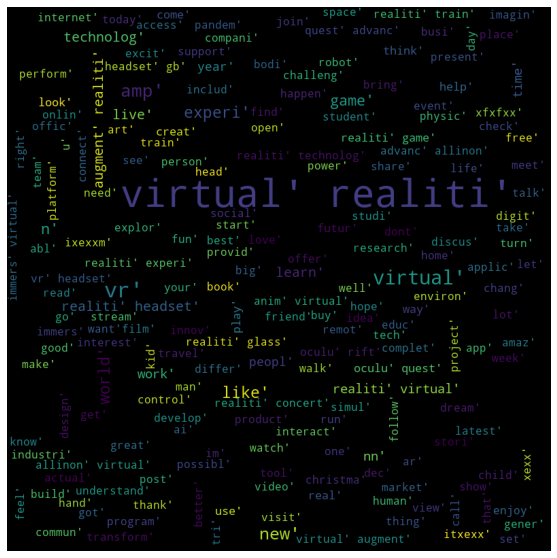

In [344]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 
for val in clean_tweets_df.Text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

## Clustering

In [345]:
from gensim.models import Word2Vec
sentences = clean_tweets_df['Text']
model = Word2Vec(sentences, min_count=1)

In [346]:
list(model.wv.vocab)
print (len(list(model.wv.vocab)))

8431


In [347]:
X = model[model.wv.vocab]

<ipython-input-347-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [349]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [350]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

virtual:0
realiti:0
effect:0
train:0
lucid:0
dream:0
accord:0
scientif:0
studi:0
:0
prime:1
studio:0
help:0
brand:0
connect:0
emot:0
audienc:0
design:0
custom:0
visual:0
experi:0
video:0
product:0
visit:0
use:0
remot:0
crawler:0
camera:0
discov:0
whatxexx:0
beneath:0
home:0
provid:0
goggl:0
imagin:0
amazingfeel:1
like:0
run:0
hall:0
wow:0
thatll:0
level:0
brain:0
danc:0
simul:0
look:0
futur:0
headset:0
best:0
one:0
availablen:0
scientificxcxastudi:0
kiyoshi:0
kurosawa:0
contempl:1
critic:0
melodrama:0
travelogu:0
tale:0
fabric:0
tv:0
xexxxcxarichard:0
brodi:0
new:0
yorkernnarea:0
premier:0
end:0
earth:0
open:0
friday:0
xexx:0
save:0
xcxa:0
ultim:0
game:0
read:0
fourth:1
transform:0
rapid:0
migrat:2
amp:0
augment:0
activ:0
line:0
nsip:0
paintngam:0
partynstar:0
performancesnbodi:0
art:0
tottoosnfashion:0
pop:0
free:0
younth:0
decemb:0
xfxfxxaxfxfxxaxfxfxxaxfxfxxaxfxfxxa:0
anxieti:0
learn:0
entrepreneur:0
make:0
app:0
tri:0
pm:0
pt:0
et:0
hand:0
factori:0
seal:0
oculu:0
quest:0
gb:0
join

first:0
optic:0
coher:0
tomographi:0
cardiologist:0
nnthi:0
cath:0
havent:1
seen:0
carenn:1
relax:0
bhai:0
shatter:0
lifetim:1
illus:0
fantasi:0
xfxfxx:0
janet:1
jackson:0
honest:0
eat:0
among:0
week:0
ago:0
showhous:0
nnto:0
navig:0
click:0
herenn:0
homenn:2
icymi:0
treat:0
coronari:0
arteri:0
sector:0
hour:0
knownnintendoxexx:0
boy:0
pseudovirtualr:0
gave:0
sever:0
headach:0
spent:0
net:0
matter:0
nvirtual:0
insan:0
secondari:1
teld:0
pictur:0
theyxexxr:0
workshop:0
xfxfxxc:0
ava:0
top:0
film:0
weekn:0
cart:1
concert:0
singl:0
goin:0
crazynnhistor:0
philippin:0
ntop:0
song:0
crazi:0
nncongratul:1
xfxfxxfnngood:0
xfxfxxaann:0
hyperpersonalis:1
moment:0
geotag:0
glimps:0
personalis:0
cloudxexxd:0
explain:0
clemen:0
wangerin:0
rage:2
scari:0
xfxfxdxaxfxfxfxxfxfxexxfxfxcxa:0
welcom:0
venu:0
consortium:1
ai:0
unlock:0
elus:0
state:0
utopian:0
close:0
truth:0
xfxfxaxanew:0
analgesia:0
larg:0
wound:0
debrid:0
childrennnread:0
heren:0
copyright:0
hunter:0
hoffman:0
stick:0
watercool:0
choos:

cofound:0
estat:0
broadcast:0
virtualdiv:0
underwat:0
santorini:1
gtm:0
exactli:0
plant:2
hold:0
host:0
server:0
circl:0
ofxexxa:0
direct:0
loop:0
deathb:0
die:0
laughter:0
gawd:0
everythingnxfxfxaxaxfxfxaxaxfxfxaxa:0
futurist:0
nhow:0
letxexx:0
refast:0
erad:0
hbot:0
victimsnim:0
hungryhbot:0
nthe:0
victim:0
temporari:0
mild:0
earach:0
wearew:1
trooper:0
rofl:0
iceland:0
stone:0
edibl:0
liszt:0
solutionxexxaxexxabecaus:0
todaynn:0
grand:0
prairi:0
yearn:1
cheap:0
imit:0
silicon:0
doll:0
companion:0
fakehood:1
what:0
talkin:0
hang:0
shxcxactxfxfxaxaxfxfxaxa:0
ainxexxt:0
abc:0
whisk:2
yield:1
outcom:0
thoracoscop:1
surgeri:0
reli:0
lung:0
monitor:0
expertli:0
craft:0
motum:0
peak:0
intuit:0
optimis:0
allencompass:0
halflif:0
nomine:0
gamespot:0
bruv:2
thatxexx:0
anatomi:1
fund:0
sidequest:1
vintag:0
firstpersonshoot:1
premium:0
domain:0
ndm:0
attent:0
san:0
antonio:0
parent:0
son:0
scorch:0
drive:0
backspin:0
drop:0
tower:0
tank:0
virtualvoodoo:0
satellit:0
suffer:0
kinki:1
ha:0
might:2

rest:0
scroll:0
shipn:0
nif:0
itnn:0
vt:2
seiz:1
financi:0
enliven:0
lone:0
trader:0
replic:0
eventsnvia:0
punchout:0
sell:0
covidnhelp:0
salespeopl:0
customerxexx:0
viru:0
xexxwar:0
terrorxexx:0
morph:0
virusesxexx:0
covidsaf:0
pwc:0
fair:0
park:0
phd:0
niu:0
thrive:0
near:0
masochist:1
sensap:1
bayer:2
munich:2
opioid:0
spare:0
orthoped:1
outpati:0
ovr:0
locomot:0
grandmoth:0
aneurysm:0
lost:0
cherish:1
xfxfxxa:0
pr:0
nnshopper:1
ist:1
learnin:0
strike:0
curbsid:0
player:0
contend:0
superintend:1
schoolsnn:1
dustbal:0
prospect:0
insur:0
sourc:0
filmstrip:0
schoolne:0
santa:0
itemsnnlet:0
questionnairexcxastudi:0
suspens:0
mountain:0
uncl:0
airn:0
dloc:0
consolid:0
ingleton:1
consult:0
mrb:1
chap:0
extortion:0
inquiri:0
x:0
memphi:0
sanit:0
workerxexx:0
mlk:0
assassin:0
mexican:0
lynch:1
shoe:0
negro:0
leagu:0
basebal:0
deliveryn:1
cap:0
recordset:1
cloud:0
refresh:0
xfxfxxdxfxfxfxbbxfxfxxxfxfxcxaaxfxfxdxc:0
hey:0
friendsxfxfxxnxfxfxxcpleas:0
nilufar:1
murodova:0
xfxfxxaxexxdxfxfxxbb:

wors:0
immun:0
kmnzxexxevr:0
realityxexxfnxexfxa:0
housenxexbdxcxexaxexefxbcxakmncrewn:0
evolv:0
remind:0
nown:1
mayor:0
backpack:0
savag:0
nntherefor:1
xfxfxaxdnnlet:0
hau:0
babylon:0
bet:0
yall:2
telepres:0
gig:0
labor:0
forev:0
ppl:0
foreclos:2
xexxtravel:0
supper:0
ilrn:0
weekend:0
entic:0
bluntli:0
nine:0
solo:0
famou:0
varjo:0
dualresolut:0
tribe:0
lex:0
meer:0
te:0
weinig:0
geld:1
fp:0
likexexxa:0
starter:0
hyperaesthetic:0
malais:0
vection:0
renew:0
mainstream:0
enthusiast:0
opinion:0
naiv:0
dunno:0
lesbian:0
premis:0
spoiler:0
parapaleg:1
sinc:0
vow:0
socal:2
mainli:2
preciou:0
deer:0
deeper:0
correct:0
felon:0
stash:0
alongsid:0
friendxexx:0
delici:0
angl:0
he:0
globalist:0
nwo:0
mapl:0
pancak:0
aroma:0
sip:0
sweet:0
banana:0
cinnamon:0
simpli:0
beer:0
sticki:0
french:0
toast:0
untappd:0
astronaut:0
karat:0
youxexxv:0
tune:0
lunat:1
erdogan:1
coffe:0
affect:0
reallif:0
gi:1
kung:1
fu:0
grip:0
xd:0
industryxexx:0
barrier:0
surreal:0
wander:1
stormland:1
xfxfxxaand:0
xfxfxaxd:0

voicenncheck:0
comedi:0
xexcxaxexcxaxfxfxxabxfxfxxabnn:0
bag:0
atir:1
cosi:0
xfxfxxaxefxbxfnn:1
pleb:1
liveaug:0
realityth:0
realityneur:0
lace:0
pyramid:0
yxexxallxexx:1
reveng:0
medianin:1
veham:1
mv:1
livestreamern:1
spine:0
gimmick:1
lanman:0
mxcxad:0
egypt:1
sistin:1
chapel:0
investmentsnnvia:0
hopelessli:1
projectorbas:0
hydrotherapi:0
withinsubject:0
crossov:0
srsli:0
parallelvirtu:1
xexxcrealityxexxd:0
transfr:1
hardhit:0
pioneer:0
prolli:0
xfxfxaxbxexxdxexxxefxbxf:0
trampl:2
unimagin:0
boundariesn:0
reki:0
kawahara:0
abec:0
protagonist:0
kazuto:0
kirito:0
kirigaya:0
asuna:0
yuuki:0
mmorpg:0
nsecond:0
nbi:0
nboth:0
bidsnn:0
tire:0
pointi:0
somebodi:0
virtuou:2
duran:0
unbundl:0
postseamless:0
xexxcallow:0
oim:0
sensit:0
sexual:0
assault:0
homicid:0
etcxexxd:1
lock:0
shinecon:0
casqu:0
ussr:0
mindblow:0
mahabharata:0
xcbxa:0
full:0
cinemannshut:0
twin:0
funni:0
mmpr:0
learnt:0
xexxein:0
xexxaxcxahaw:0
aalenxcxaxexxaxcxaaalen:0
nnfinanc:0
placebo:2
xexxcempathi:0
forxexxd:0
remix

xfxfxxexfxfxxdnnbook:0
purduedevelop:0
gettysburg:0
dday:1
normandi:0
strateg:0
crisismanag:0
skillsn:0
publilc:0
nbut:1
xexxdxefxbxf:0
artif:0
nxfxfxaxalway:0
fever:0
wombat:0
mystma:1
teachersnn:0
plainli:0
wholli:0
subvert:0
tactil:0
brandxr:0
nocod:1
eager:0
trillionvirtu:1
storag:0
trillion:0
ofinfl:1
retir:2
militaryxcxalead:0
glove:0
solid:0
crumb:0
disobedi:0
tkkindergarten:0
smell:0
nutrit:1
grappl:1
t:0
admin:0
warm:0
leadersn:2
gundamlik:0
pornhubnnpornhub:0
pornograph:1
montreal:0
pornhub:0
limassol:1
cypru:0
discreetli:0
transfer:0
lucr:1
johnni:0
regain:0
newslett:0
skirt:2
inact:0
algorythm:0
thingnand:1
string:0
opp:0
nina:0
nreal:1
vodafon:0
smartphoneteth:0
obtain:1
approv:0
irb:0
chesapeak:0
oncolog:0
hyperdynam:0
hearabl:0
hereand:0
snek:1
clariti:0
coronavirusnni:0
offngt:1
costeffect:1
hb:0
fullerxexx:0
shortag:0
unfil:0
thick:0
blueberri:0
milkshak:0
appsnn:0
bern:0
groundbreak:0
rp:0
baptism:0
supervenu:0
emc:0
carn:0
alejandro:0
ixcxbxcxarritu:0
presal:0
nnbe:0

divexfxfxxa:0
wellstuf:0
chairxexdxxefxbxfxfxfxfxaxexxdxexxxefxbxfxfxfxax:0
arcor:0
findsnn:0
marin:0
automot:0
repair:1
retent:0
loyalti:0
learnnn:0
nnsanta:2
nnbook:0
haan:0
yehnal:0
prk:0
visibl:0
prkian:0
nfor:0
cest:0
ubi:0
experiment:1
atxcxaato:1
disorderny:0
respect:0
humanityncloak:1
worldnyou:0
realityni:1
mankindnndisconnect:0
worldndisconnect:0
xexxeverywherexexx:1
shareabl:1
peoplen:0
musthav:0
nonvirtualr:1
uncompel:0
nonvr:0
barn:0
nowher:0
hasnxexxt:0
substanti:0
wayn:0
betn:2
gradual:0


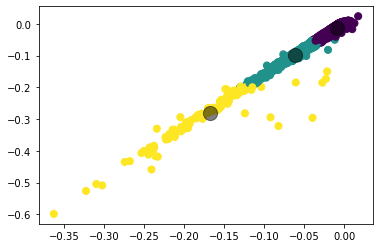

In [295]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);